## Low-pass filtering experiment

After adding noise to my sine wave, I wanted to see how different cutoff frequencies affect the quality of signal recovery.

I picked 5Hz, 10Hz, and 20Hz as trial cutoffs.

Below are the results...


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
fs = 500  # samples per second
duration = 2  # seconds
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Create a clean sine wave (5 Hz)
freq = 5
signal = np.sin(2 * np.pi * freq * t)

# Add Gaussian noise
noise = np.random.normal(0, 0.5, size=signal.shape)
noisy_signal = signal + noise


In [4]:
#Creating a function to filter cutoff values
def apply_lowpass_filter(signal, fs, cutoff):
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(len(fft_vals), 1/fs)
    
    # Mask frequencies above cutoff
    mask = np.abs(fft_freqs) < cutoff
    filtered_fft = fft_vals * mask
    filtered_signal = np.fft.ifft(filtered_fft).real
    return filtered_signal


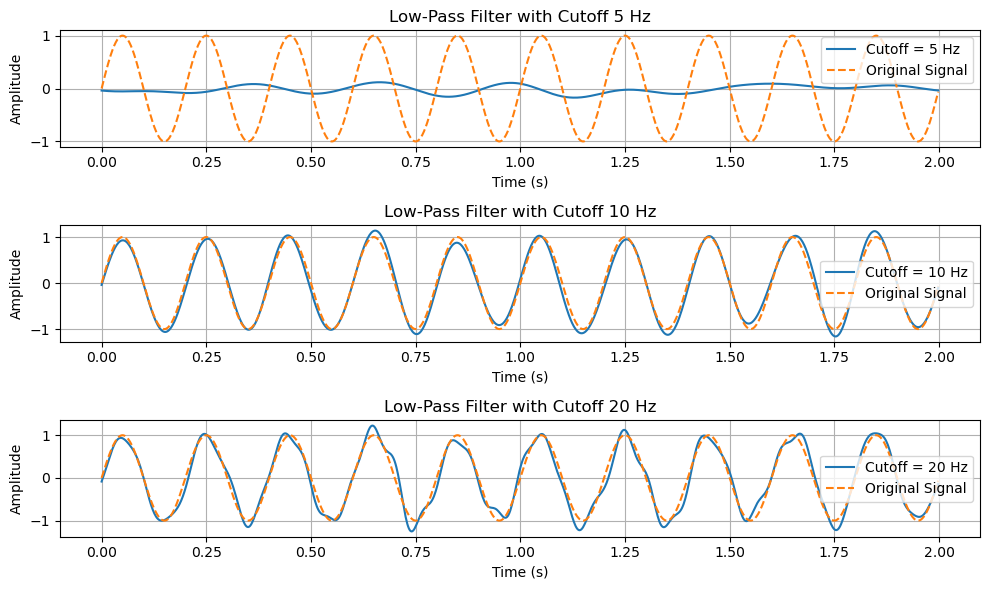

In [6]:
#Multiple cutoff values
cutoff_values = [5, 10, 20]
plt.figure(figsize=(10, 6))

for i, cutoff in enumerate(cutoff_values, 1):
    filtered = apply_lowpass_filter(noisy_signal, fs, cutoff)
    plt.subplot(len(cutoff_values), 1, i)
    plt.plot(t, filtered, label=f'Cutoff = {cutoff} Hz')
    plt.plot(t, signal, '--', label='Original Signal')
    plt.title(f"Low-Pass Filter with Cutoff {cutoff} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Insights
- At 5 Hz cutoff: mostly smooth, but maybe some of the signal is lost
- At 10 Hz: balances noise reduction + signal retention
- At 20 Hz: keeps too much noise


### Insights from Filtering

I tested 3 cutoff values: 5 Hz, 10 Hz, and 20 Hz on a 5 Hz sine wave with added Gaussian noise.

- **5 Hz cutoff**: The signal is very smooth but seems slightly weakened — possibly filtering some of the real wave.
- **10 Hz cutoff**: Best balance — the sine shape is preserved while noise is significantly reduced.
- **20 Hz cutoff**: Signal is sharp, but a lot of noise leaks through. Not ideal for denoising.



 5 Hz Cutoff:
A 5 Hz sine wave barely fits through a 5 Hz filter.

So the signal is very smoothed, and even some of the real wave shape gets lost.

But noise is mostly gone, so it's quiet.

Interpretation:

“Very smooth result, but possibly over-filtered — signal is slightly dampened.”

 10 Hz Cutoff:
Still blocks high-frequency noise, but lets more of the original signal shape pass.

The sine wave retains its natural amplitude and curve.

Interpretation:

“Seems to balance noise removal with signal clarity. Best trade-off for this setup.”

 20 Hz Cutoff:
Many noisy components have frequencies under 20 Hz.

The result is a noisier wave, but with no signal distortion.

Interpretation:

“More noise gets through — the wave looks sharper but less clean overall.”

**Next, I might try cutoff values in between or explore more advanced filters like Butterworth or windowed filters.**

